#### **_This is a test file to show the general uses of DashMed and to demonstrate a proof-of-concept. The style presented in this notebook is not an example of how it should be used. This is just to highlight some of the basic functions and to show some example outputs._**

# Testing the `database` module from DashMed
**The password for admin is 'admin123' and for scribe is 'scribe123'**

In [18]:
from dashmed.database import sqlite, role
import os

# Initialize the test database using sqlite
test = sqlite.SQLiteDB('test.db')

# Initialize the users
admin1 = role.Admin('Shayla', 22)
scribe1 = role.Scribe('Matthew', 23)

try:
    # Connect and initialize the database
    test.initialize_db()
    test.connect()

    # Insert CSV data as scribe
    try:
        test.insert_csv_data(scribe1, 'patient_data/patients.csv') 
    except PermissionError:
        print('Wrongful permission denial.')
    
    # Inserting BP Tables as scribe
    try:
        for filename in os.listdir('patient_data/patient_bp/'):
            if filename.endswith(".csv"):
                csv_file = os.path.join('patient_data/patient_bp/', filename)
                test.insert_csv_data(scribe1, csv_file)
    except PermissionError:
        print('Wrongful permission denial.')

    # Show tables as admin
    try:
        test.show_tables(admin1)
    except PermissionError:
        print('Wrongful permission denial.')

    # Delete table as scribe (should fail)
    try:
        test.delete_table(scribe1, 'patients')
    except PermissionError:
        print('Scribe does not have permission to delete tables.')
# Raise other errors if they appear
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    test.close()

# Note that the sqlite_sequence is a default table when using SQLite


Database initialized.
Data from patient_data/patients.csv added to patients table.
Data from patient_data/patient_bp/30110_BP.csv added to 30110_BP table.
Data from patient_data/patient_bp/23989_BP.csv added to 23989_BP table.
Data from patient_data/patient_bp/33764_BP.csv added to 33764_BP table.
Data from patient_data/patient_bp/30111_BP.csv added to 30111_BP table.
Data from patient_data/patient_bp/40284_BP.csv added to 40284_BP table.
Data from patient_data/patient_bp/54658_BP.csv added to 54658_BP table.
Data from patient_data/patient_bp/57180_BP.csv added to 57180_BP table.
Data from patient_data/patient_bp/97021_BP.csv added to 97021_BP table.
Tables in the database:
patients
users
sqlite_sequence
30110_BP
23989_BP
33764_BP
30111_BP
40284_BP
54658_BP
57180_BP
97021_BP
Scribe does not have permission to delete tables.


### Expected Output
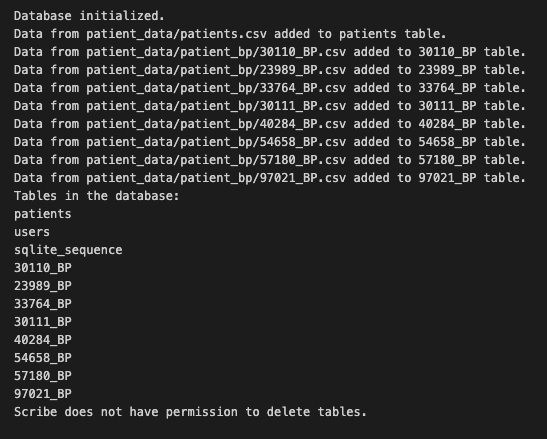

***
*Note that the sqlite_sequence is a default table when using SQLite*

# Testing the `dash` module form DashMed
Here, we rely on the running the test cell above that tests the `database` modules.
**Use 23989 as input for patient ID.**

Patient Dashboard
-------------------------------------
Patient ID: 23989
First name: Edward
Last name: Johnson
Address: 101 Maple Ave
Phone: (555) 123-4567
Sex: M
Brithdate: 1989-01-24
Age: 34
Related patients: Diana Smith
Medical history: Hypertension
Medication: Lisinopril
-------------------------------------


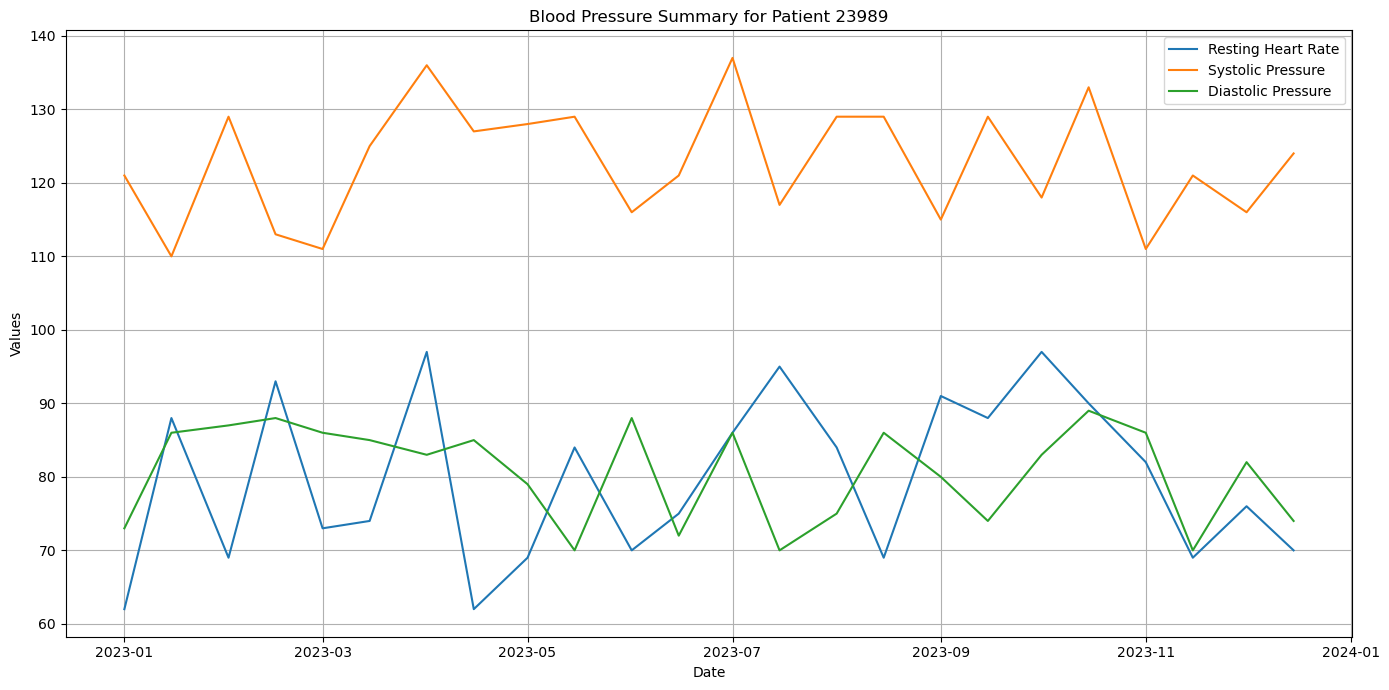

Access denied.


In [20]:
from dashmed.dash import display, bpgraph

# Ask for user input to get a patient ID
### Use 23989 as input for patient ID
pid = input('Input a patient ID:')

# Create and display the patient dashboard
dashboard = display.Dashboard(display.PatientSummary(test, pid), admin1)
dashboard.display_dash()

# Create and display the blood pressure graph, with admin and scribe roles
bp = bpgraph.BPSummary(test, pid, admin1)
bp_bad = bpgraph.BPSummary(test, pid, scribe1)

# This should run properly as admin has permission to see the graph
try:
    bp.plot()
except PermissionError:
    print('Wrong permission denial.')

# This should NOT run since scribes do not have access to see graphs
try:
    bp_bad.plot()
except PermissionError:
    print('Scribe does not have permission to view blood pressure data.')

### Expected Output
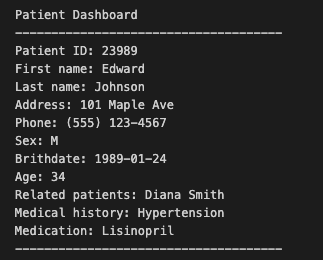
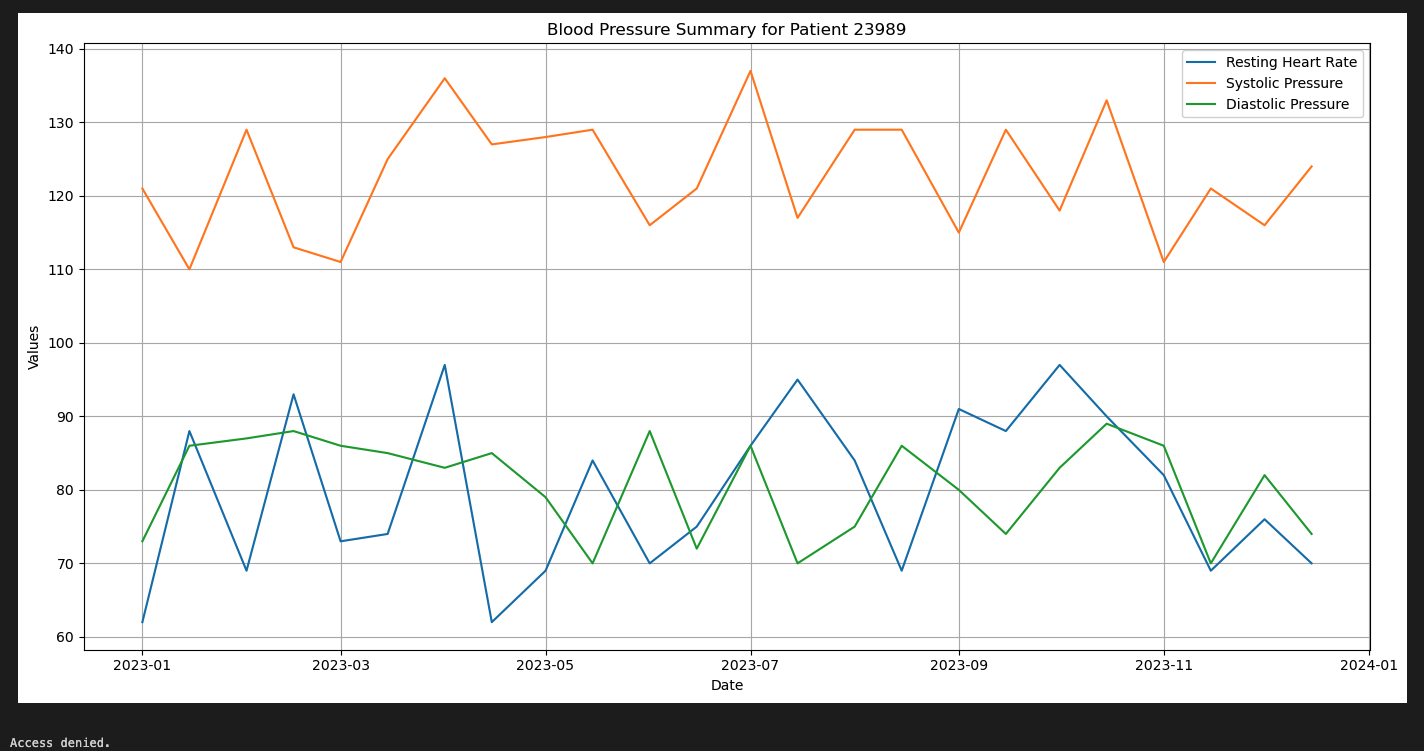